### **Step 1: Load the IRIS dataset**

In [ ]:
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()

iris_df=pd.DataFrame(iris.data)
iris_df['class']=iris.target

iris_df.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris_df.dropna(how="all", inplace=True)

### **Step 2: Pre-processing of the dataset.**

**a.	Convert categorical values to numeric values using one hot encoder.**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

enc_df = pd.DataFrame(enc.fit_transform(iris_df[['class']]).toarray())
enc_df = enc_df.rename(columns={0: "setosa", 1: "versicolor",2:'virginica'})

**b.	Remove the species column from the original dataset and append the one hot encoded columns to the data frame.**

In [ ]:
iris_df = iris_df.join(enc_df)

iris_df = iris_df.drop('class', axis=1)

iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0


**c.	Scale the four feature columns of the data frame using standard scaler.**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

feature_columns = iris_df.iloc[:,0:4].columns

iris_df[feature_columns] = scaler.fit_transform(iris_df[feature_columns])

### **Step 3: Building the three-layer feedforward neural network.**

In [ ]:
x = iris_df.iloc[:,0:4].values
y = iris_df.iloc[:,-3:].values

**a.	Build the three-layer feedforward neural network, use sigmoid as the activation.**

**b.	No. of neurons in hidden layer are 2.**

**c.	Initialize the network with random weights and biases.**

**d.	Use sigmoid as the activation function.**

In [ ]:
import tensorflow as tf

w_i_h = tf.Variable(tf.random.normal([4, 2], dtype=tf.double))
w_h_o = tf.Variable(tf.random.normal([2, 3], dtype=tf.double))

b1 = tf.Variable(tf.random.normal([2], dtype=tf.double))
b2 = tf.Variable(tf.random.normal([3], dtype=tf.double))

h = tf.sigmoid(tf.matmul(x, w_i_h) + b1)

o = tf.sigmoid(tf.matmul(h, w_h_o) + b2)

**e.	Use loss function as MSE.**

In [ ]:
def mse_loss(y_true, y_predicted):
  return tf.reduce_mean(tf.square(y_true - y_predicted))

def accuracy(y_true, y_predicted):
  y_predicted_labels = tf.argmax(y_predicted, axis=1)
  y_true_labels = tf.argmax(y_true, axis=1)
  return tf.reduce_mean(tf.cast(tf.equal(y_predicted_labels, y_true_labels), tf.float32))

**f.	Compute the MSE and accuracy**

In [ ]:
print(mse_loss(y, o).numpy())
print(accuracy(y, o).numpy())

0.2623372850156968
0.33333334


### **Step 4: Implement backpropagation for this network.**

**a.	Use learning rate as 0.01**

**b.	No. of iterations as 5000**

In [ ]:
w_i_h = tf.Variable(tf.random.normal([4, 2], dtype=tf.double))
w_h_o = tf.Variable(tf.random.normal([2, 3], dtype=tf.double))

b1 = tf.Variable(tf.random.normal([2], dtype=tf.double))
b2 = tf.Variable(tf.random.normal([3], dtype=tf.double))

learning_rate = 0.01

epochs = 5000

losses = []
accuracies = []

for i in range(epochs):
  # forward pass
  h = tf.sigmoid(tf.matmul(x, w_i_h) + b1)
  o = tf.sigmoid(tf.matmul(h, w_h_o) + b2)

  # calculate loss
  loss = mse_loss(y, o)
  losses.append(loss.numpy())

  # calculate accuracy
  acc = accuracy(y, o)
  accuracies.append(acc.numpy())

  # backpropagation
  # output layer error
  o_error = y - o
  o_delta = o_error * o * (1 - o)

  # hidden layer error
  h_error = tf.matmul(o_delta, tf.transpose(w_h_o))
  h_delta = h_error * h * (1 - h)

  # update weights and biases
  w_h_o = w_h_o + learning_rate * tf.matmul(tf.transpose(h), o_delta)
  b2 = b2 + learning_rate * tf.reduce_mean(o_delta, axis=0)

  w_i_h = w_i_h + learning_rate * tf.matmul(tf.transpose(x), h_delta)
  b1 = b1 + learning_rate * tf.reduce_mean(h_delta, axis=0)

  # printing progress
  if i % 500 == 0:
    print(f"Epoch {i}: Loss = {loss.numpy()}, Accuracy = {acc.numpy()}")

Epoch 0: Loss = 0.35948726413415816, Accuracy = 0.3333333432674408
Epoch 500: Loss = 0.08298939232310308, Accuracy = 0.9466666579246521
Epoch 1000: Loss = 0.07719081935991699, Accuracy = 0.9733333587646484
Epoch 1500: Loss = 0.07400697013122488, Accuracy = 0.9733333587646484
Epoch 2000: Loss = 0.07177286759401408, Accuracy = 0.9733333587646484
Epoch 2500: Loss = 0.06999197575713721, Accuracy = 0.9733333587646484
Epoch 3000: Loss = 0.0684553639544628, Accuracy = 0.9733333587646484
Epoch 3500: Loss = 0.06706288045724954, Accuracy = 0.9733333587646484
Epoch 4000: Loss = 0.06576147633744187, Accuracy = 0.9733333587646484
Epoch 4500: Loss = 0.06452079811377777, Accuracy = 0.9733333587646484


**c.	Plot the MSE and accuracy.**

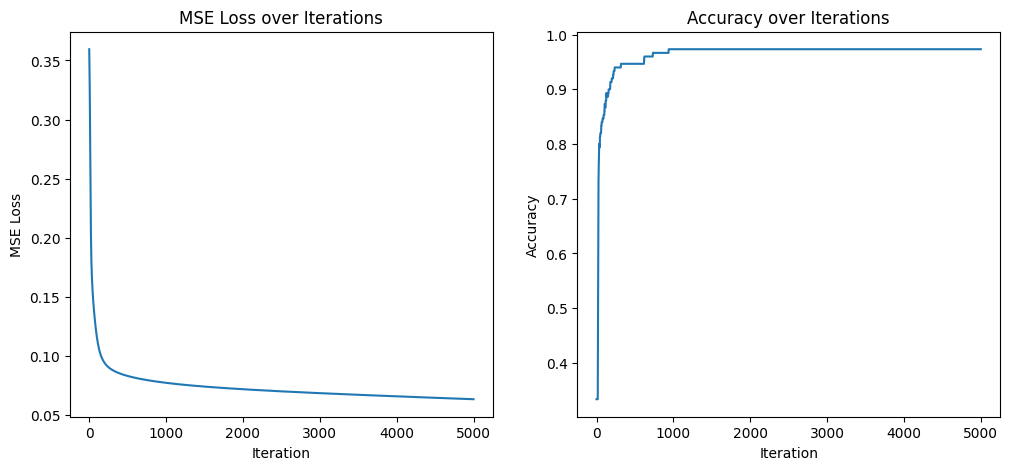

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.title("MSE Loss over Iterations")

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracy over Iterations")

plt.show()

### **Step 5: Change the learning rate and no. of iterations and note the performance. Highlight the optimum performance.**

In [ ]:
results = []

learning_rates = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]
epochs_list = [500, 5000]

for lr in learning_rates:
  for epochs in epochs_list:
    w_i_h = tf.Variable(tf.random.normal([4, 2], dtype=tf.double))
    w_h_o = tf.Variable(tf.random.normal([2, 3], dtype=tf.double))

    b1 = tf.Variable(tf.random.normal([2], dtype=tf.double))
    b2 = tf.Variable(tf.random.normal([3], dtype=tf.double))

    losses = []
    accuracies = []

    for i in range(epochs):
      # forward pass
      h = tf.sigmoid(tf.matmul(x, w_i_h) + b1)
      o = tf.sigmoid(tf.matmul(h, w_h_o) + b2)

      # calculate loss
      loss = mse_loss(y, o)
      losses.append(loss.numpy())

      # calculate accuracy
      acc = accuracy(y, o)
      accuracies.append(acc.numpy())

      # backpropagation
      # output layer error
      o_error = y - o
      o_delta = o_error * o * (1 - o)

      # hidden layer error
      h_error = tf.matmul(o_delta, tf.transpose(w_h_o))
      h_delta = h_error * h * (1 - h)

      # update weights and biases
      w_h_o = w_h_o + learning_rate * tf.matmul(tf.transpose(h), o_delta)
      b2 = b2 + learning_rate * tf.reduce_mean(o_delta, axis=0)

      w_i_h = w_i_h + learning_rate * tf.matmul(tf.transpose(x), h_delta)
      b1 = b1 + learning_rate * tf.reduce_mean(h_delta, axis=0)

    final_loss = losses[-1]
    final_accuracy = accuracies[-1]
    results.append((lr, epochs, final_loss, final_accuracy))

# results
print("Sr. No.\tLearning rate\tIterations\tMSE\tAccuracy")
for i, (lr, num_iterations, loss, acc) in enumerate(results):
  print(f"{i+1}\t{lr}\t\t{num_iterations}\t\t{loss:.4f}\t{acc:.4f}")

# optimal performance
best_result = min(results, key=lambda x: x[2])  # to find minimum loss
print("\nOptimum Performance:")
print(f"Learning Rate: {best_result[0]}")
print(f"Iterations: {best_result[1]}")
print(f"MSE: {best_result[2]:.4f}")
print(f"Accuracy: {best_result[3]:.4f}")


Sr. No.	Learning rate	Iterations	MSE	Accuracy
1	0.01		500		0.0946	0.9000
2	0.01		5000		0.0716	0.9800
3	0.1		500		0.0890	0.9333
4	0.1		5000		0.0650	0.9667
5	0.2		500		0.1389	0.6333
6	0.2		5000		0.0398	0.9733
7	0.3		500		0.0797	0.9400
8	0.3		5000		0.0619	0.9600
9	0.4		500		0.0900	0.8933
10	0.4		5000		0.0576	0.9733
11	0.5		500		0.0881	0.9733
12	0.5		5000		0.0547	0.9733

Optimum Performance:
Learning Rate: 0.2
Iterations: 5000
MSE: 0.0398
Accuracy: 0.9733
